Connor Richardson

# Take-Home Exam 1

Complete the data analysis tasks in the provided Jupyter notebook. You'll need to write code to answer questions about a dataset and explain your work throughout.

**Code + Commentary**: For each question, write the necessary code and (necessary but not limited to):

- Visualize your data (usuful for inspecting it, but also to justify your choices)
- Explain why you chose specific methods or tests
- Always state the null and the laternative hypothesis clearly
- Interpret your results

*Important: Commentary is mandatory - you won't get full points without it.*

**Submission**: Upload your notebook + data files to Moodle. Make sure file paths work so your notebook runs when downloaded.

*Important: Between 5 and 15 points will be deducted for notebooks that do not run properly.*

**Grade**: Worth 30% of your final grade  
**Deadline**: October 26, 23:59

# Instructions

In [45]:
# Import here all relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import itertools

You will be working with variables from the World Development Indicators. Go to https://databank.worldbank.org/source/world-development-indicators# and download the following indicators or all countries in the year 2021:
- 'Access to electricity (% of population)' 
- 'Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)'
- 'Fertility rate, total (births per woman)'
- 'Urban population growth (annual %)'


**1) Load the data into the notebook, inspect it and clean it, thoroughly explaining your choices.**

In [2]:
#Import data
df = pd.read_csv("WorldData.csv")

#Dataset Information
df.head()

,Country Name,Country Code,Series Name,Series Code,2021 [YR2021]
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,97.7
1,Afghanistan,AFG,"Educational attainment, at least completed pri...",SE.PRM.CUAT.ZS,15.25
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,5.039
3,Afghanistan,AFG,Urban population growth (annual %),SP.URB.GROW,3.45660638746524
4,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100


In [3]:
#Dataset desriptions/statistics
year = '2021 [YR2021]'

In [4]:
set(df[year])

{'-0.0207547823222466',
 '-0.0843723464907017',
 '-0.100811873040948',
 '-0.10322377788801',
 '-0.122894919494924',
 '-0.128759359504165',
 '-0.184467862676614',
 '-0.217745708102647',
 '-0.290692169424397',
 '-0.292441093106297',
 '-0.340876576787872',
 '-0.359138359661853',
 '-0.367384540062546',
 '-0.424008238139362',
 '-0.432978826866365',
 '-0.497249317403162',
 '-0.51093087065092',
 '-0.565232007980465',
 '-0.581176359749602',
 '-0.643404510707736',
 '-0.675658604017843',
 '-0.688264282628012',
 '-0.799340656068497',
 '-0.812424226977769',
 '-0.841074692551029',
 '-0.899478872255975',
 '-0.911776749148241',
 '-1.06223420708491',
 '-1.06402478171644',
 '-1.1563087994258',
 '-1.37519431130085',
 '-1.38085987078673',
 '-1.60549820477896',
 '-1.70504559966404',
 '-10.8841106039508',
 '-2.20270746004608',
 '-2.7154026647881',
 '-4.17033630017526',
 '..',
 '0.0111247175816319',
 '0.025193005347708',
 '0.0369178844971533',
 '0.0621867074163359',
 '0.125599572362222',
 '0.156761055349018

In [5]:
df.replace('..', np.nan, inplace=True) # replace '..' for nan values

In [6]:
df = df[~df[year].isna()] # remove all nan values

In [7]:
df.dtypes

Country Name     object
Country Code     object
Series Name      object
Series Code      object
2021 [YR2021]    object
dtype: object

In [8]:
df = df.astype({year: 'float'}) # turn numeric values to type float
df.dtypes # let's check the types again

Country Name      object
Country Code      object
Series Name       object
Series Code       object
2021 [YR2021]    float64
dtype: object

In [9]:
df.head()

,Country Name,Country Code,Series Name,Series Code,2021 [YR2021]
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,97.700000
1,Afghanistan,AFG,"Educational attainment, at least completed pri...",SE.PRM.CUAT.ZS,15.250000
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,5.039000
3,Afghanistan,AFG,Urban population growth (annual %),SP.URB.GROW,3.456606
4,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000


In our analysis we will need to split countries based on their region.

**2) Load the CLASS.xlsx file that we used in previous notebooks and merge it to the previously created (cleaned) dataframe. Keep the 'Region' and 'Income group' columns.**

In [10]:
# Insert your code here. You can use more than one cell. Comment on your choices thorughout the code and comment on your result using text cells.
df_class = pd.read_excel('CLASS.xlsx')
df_class.head()

,Economy,Code,Region,Income group,Lending category
0,Afghanistan,AFG,South Asia,Low income,IDA
1,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD
2,Algeria,DZA,Middle East & North Africa,Upper middle income,IBRD
3,American Samoa,ASM,East Asia & Pacific,High income,NaN
4,Andorra,AND,Europe & Central Asia,High income,NaN


In [11]:
df_class = df_class[~df_class['Income group'].isna()]

In [12]:
df = df.merge(df_class[['Code', 'Region']], left_on='Country Code', right_on='Code', how='left')
df.drop('Code', axis=1, inplace=True)
df.head()

,Country Name,Country Code,Series Name,Series Code,2021 [YR2021],Region
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,97.700000,South Asia
1,Afghanistan,AFG,"Educational attainment, at least completed pri...",SE.PRM.CUAT.ZS,15.250000,South Asia
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,5.039000,South Asia
3,Afghanistan,AFG,Urban population growth (annual %),SP.URB.GROW,3.456606,South Asia
4,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,Europe & Central Asia


In [13]:
data = df.pivot(columns='Series Name', index=['Country Name', 'Region'], values=year).reset_index().dropna()

data.columns.name = None

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 0 to 216
Data columns (total 6 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Country Name                                                                                      119 non-null    object 
 1   Region                                                                                            119 non-null    object 
 2   Access to electricity (% of population)                                                           119 non-null    float64
 3   Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)  119 non-null    float64
 4   Fertility rate, total (births per woman)                                                          119 non-null    float64
 5   Urban p

In [33]:
data.groupby('Region').count()

,Country Name,Access to electricity (% of population),"Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)","Fertility rate, total (births per woman)",Urban population growth (annual %)
Region,,,,,
East Asia & Pacific,18,18,18,18,18
Europe & Central Asia,44,44,44,44,44
Latin America & Caribbean,22,22,22,22,22
Middle East & North Africa,10,10,10,10,10
North America,2,2,2,2,2
South Asia,6,6,6,6,6
Sub-Saharan Africa,17,17,17,17,17


In [14]:
var = 'Access to electricity (% of population)'
east_asia = data[data.Region=='East Asia & Pacific'][var]
eur = data[data.Region=='Europe & Central Asia'][var]
latam = data[data.Region=='Latin America & Caribbean'][var]
ssafr = data[data.Region=='Sub-Saharan Africa'][var]

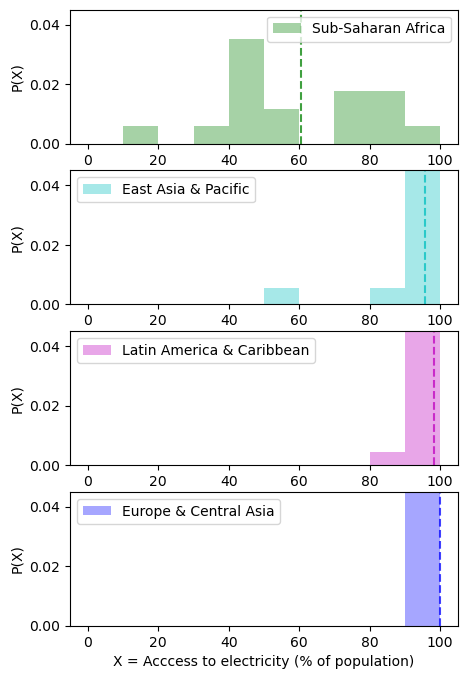

In [16]:
bins = np.linspace(0, 100, 11)

fig, ax = plt.subplots(4,1, figsize=(5,8))

ax[0].hist(ssafr, bins=bins, density=True,
           color='g', alpha=0.35, label='Sub-Saharan Africa')
ax[0].axvline(ssafr.mean(), color='g', alpha=0.75, linestyle='dashed')

ax[1].hist(east_asia, bins=bins, density=True,
           color='c', alpha=0.35, label='East Asia & Pacific')
ax[1].axvline(east_asia.mean(), color='c', alpha=0.75, linestyle='dashed')

ax[2].hist(latam, bins=bins, density=True,
           color='m', alpha=0.35, label='Latin America & Caribbean')
ax[2].axvline(latam.mean(), color='m', alpha=0.75, linestyle='dashed')

ax[3].hist(eur, bins=bins, density=True,
           color='b', alpha=0.35, label='Europe & Central Asia')
ax[3].axvline(eur.mean(), color='b', alpha=0.75, linestyle='dashed')

ax[3].set_xlabel('X = Acccess to electricity (% of population)')
for i in range(4):
  ax[i].set_ylabel('P(X)')
  ax[i].set_ylim((0,0.045))
  ax[i].legend()

plt.show()

Do different regions have different access to electricity? In the following, use appropriate statistical tests to answer this question.

**3) Inspect the distributions of access to electricity for the different regions. What test is appropriate to establish whether the regions have different access to electricity? Why? Perform the statistical test and comment on the results.**

**4) Can you think of another statistical test that would be suitable to answer this question? Perform it and comment on the results.**

# 3

In [24]:
# Insert your code here. You can use more than one cell. Comment on your choices thorughout the code and comment on your result using text cells.
# * Testing the homogeneity of variance to know if we should run ANOVA or Kruskal-Wallis. Only these four regions are considered as the rest do not have enough data points
stats.levene(east_asia, latam, eur, ssafr)

LeveneResult(statistic=np.float64(24.831256109165658), pvalue=np.float64(5.2551614569111385e-12))

As our pvalue for Levene's is <.05, the homogeneity of variance is violated and thus we will use Kruskal-Wallis

In [25]:
stats.kruskal(east_asia, latam, eur, ssafr)

KruskalResult(statistic=np.float64(61.39877990704398), pvalue=np.float64(2.953604876848656e-13))

The Kruskal–Wallis test was conducted to determine whether access to electricity differed between regions (East Asia & Pacific, Latin America & Caribbean, Europe & Central Asia, and Sub-Saharan Africa). The results showed a statistically significant difference in access to electricity across regions, H(3) = 61.40, p < 0.001. Therefore, we reject the null hypothesis.

# 4

We will check all region-pairs using the Mann-Whitney U test.

In [34]:
print("\nResult: EA/EU")
print(stats.mannwhitneyu(east_asia, eur))

print("\nResult: EA/LATAM")
print(stats.mannwhitneyu(east_asia, latam))

print("\nResult: EA/SSAFR")
print(stats.mannwhitneyu(east_asia, ssafr))

print("\nResult: EU/LATAM")
print(stats.mannwhitneyu(eur, latam))

print("\nResult: EU/SSAFR")
print(stats.mannwhitneyu(eur, ssafr))

print("\nResult: LATAM/SSAFR")
print(stats.mannwhitneyu(latam, ssafr))


Result: EA/EU
MannwhitneyuResult(statistic=np.float64(283.0), pvalue=np.float64(0.004400502804215516))

Result: EA/LATAM
MannwhitneyuResult(statistic=np.float64(216.0), pvalue=np.float64(0.5910828345276407))

Result: EA/SSAFR
MannwhitneyuResult(statistic=np.float64(290.0), pvalue=np.float64(4.261457690135257e-06))

Result: EU/LATAM
MannwhitneyuResult(statistic=np.float64(686.0), pvalue=np.float64(7.90846236691828e-05))

Result: EU/SSAFR
MannwhitneyuResult(statistic=np.float64(748.0), pvalue=np.float64(6.04824817691768e-13))

Result: LATAM/SSAFR
MannwhitneyuResult(statistic=np.float64(362.0), pvalue=np.float64(5.287262008196612e-07))


Pairwise two-sided Mann–Whitney U tests were performed to examine differences in electricity access among four regions (East Asia & Pacific, Europe & Central Asia, Latin America & Caribbean, Sub-Saharan Africa). The tests indicated significant differences in most comparisons (p < 0.05), except between East Asia & Pacific and Latin America & Caribbean (p=0.591), which did not differ significantly. 

**5) Is electricity access in the regions of Europe & Central Asia higher than in those of East Asia & Pasific? Perform an appropiate test to answer this question.**

In [36]:
# Insert your code here. You can use more than one cell. Comment on your choices thorughout the code and comment on your result using text cells.
stats.mannwhitneyu(eur, east_asia, alternative='less')

MannwhitneyuResult(statistic=np.float64(509.0), pvalue=np.float64(0.9979685850384272))

A one-sided Mann–Whitney U test was conducted to determine whether electricity access in Europe & Central Asia is higher than in East Asia & Pacific. The test did not show a statistically significant difference (p=0.998), indicating that electricity access in these two regions is comparable in this dataset.

**6) Do you notice something particular about the results of these tests? Comment on it using the concept of effect size.**

In [ ]:
# Insert your code here. You can use more than one cell. Comment on your choices thorughout the code and comment on your result using text cells.
def cliffs_delta(a, b):

    a = np.asarray(a)
    b = np.asarray(b)

    # Create pairwise comparison matrix
    diff = a[:, None] - b  # shape (len(a), len(b))

    greater = np.sum(diff > 0)
    less = np.sum(diff < 0)

    n = a.size * b.size
    delta = (greater - less) / n
    return delta

regions = {
    "East Asia": east_asia,
    "Europe": eur,
    "Latin America": latam,
    "Sub-Saharan Africa": ssafr
}

In [ ]:
pairs = list(itertools.combinations(regions.keys(), 2))

# Compute and print Cliff's delta for all pairs
for r1, r2 in pairs:
    delta = cliffs_delta(regions[r1], regions[r2])
    print(f"({r1} vs {r2}): {delta:}")


Cliff's delta (East Asia vs Europe): -0.28535353535353536
Cliff's delta (East Asia vs Latin America): 0.09090909090909091
Cliff's delta (East Asia vs Sub-Saharan Africa): 0.8954248366013072
Cliff's delta (Europe vs Latin America): 0.41735537190082644
Cliff's delta (Europe vs Sub-Saharan Africa): 1.0
Cliff's delta (Latin America vs Sub-Saharan Africa): 0.9358288770053476


We want to repeat a similar analysis using resampling approaches.

**7) Focus on countries in the Sub-Saharan Africa region: compute the bootstrapped median of the access to electricity and its 95% confidence interval and visualize them.**

**8) Focus on counties in the Latin America & Caribbean with Europe & Central Asia regions: use a permutation test to check whether the countries have the same median access to electricity.**

In [ ]:
# Insert your code here. You can use more than one cell. Comment on your choices thorughout the code and comment on your result using text cells.

We now want to test whether fertility rate and urban population growth are correlated.

**9) Choose an appropriate statistical test to assess the correlation between these two variables and use a permutation approach to it. Justify your choice of test.**

In [ ]:
# Insert your code here. You can use more than one cell. Comment on your choices thorughout the code and comment on your result using text cells.


We now want to explore the relationship between income group and regions of the world.

**10) Is the observed distribution of number of countries per income group compatible with a uniform distribution?**

**11) Is a country's probability of being in a given income group independent of the probability of being in a given region? Consider only countries in the East Asia & Pacific, Europe & Central Asia, Latin America & Caribbean and Sub-Saharan Africa regions.**

In [ ]:
# Insert your code here. You can use more than one cell. Comment on your choices thorughout the code and comment on your result using text cells.

**12) Test the alternative hypothesis that a country's fertility rate is higher than its urban population growth. Answer this question *using a resampling approach implemented by hand (i.e. not using a built-in function).*** 

In [ ]:
# Insert your code here. You can use more than one cell. Comment on your choices thorughout the code and comment on your result using text cells.